In [30]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import plotly.figure_factory as ff
import plotly.graph_objects as graph_objects
from sklearn.model_selection import train_test_split

1. import Data

In [31]:
df = pd.read_csv('Lead Scoring.csv')

In [32]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

1.1 Identify numerical columns

In [34]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

In [35]:
#Fill missing numerical data with the mean value
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

1.2 Identify non-numerical columns

In [36]:
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64'])

In [37]:
#Fill missing non-numerical data with "Missing"
df[non_numeric_cols.columns] = non_numeric_cols.fillna('Missing')

2.Feature encoding

In [38]:
# Use label encoding to encode non-numerical columns in the DataFrame
def encode_non_numeric(df):
  encoded_df = df.copy()
  non_numeric_cols = encoded_df.select_dtypes(exclude=['int64', 'float64'])
  le = LabelEncoder()
  for column in non_numeric_cols.columns:
        encoded_df[column] = le.fit_transform(non_numeric_cols[column].astype(str))

  return encoded_df
df_encode=encode_non_numeric(df)

In [39]:
df_encode

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4427,660737,0,7,0,0,0,0.0,0,0.00,...,0,5,5,1,1,15.0,15.0,0,0,8
1,1554,660728,0,8,0,0,0,5.0,674,2.50,...,0,5,5,1,1,15.0,15.0,0,0,4
2,5140,660727,1,1,0,0,1,2.0,1532,2.00,...,0,4,1,1,0,14.0,20.0,0,1,4
3,467,660719,1,1,0,0,0,1.0,305,1.00,...,0,5,1,1,0,13.0,17.0,0,0,8
4,1874,660681,1,3,0,0,1,2.0,1428,1.00,...,0,5,1,1,0,15.0,18.0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,951,579564,1,1,1,0,1,8.0,1845,2.67,...,0,4,1,1,0,15.0,17.0,0,0,3
9236,4782,579546,1,1,0,0,0,2.0,238,2.00,...,0,4,1,1,0,14.0,19.0,0,1,12
9237,6184,579545,1,1,1,0,0,2.0,199,2.00,...,0,4,1,1,0,13.0,20.0,0,1,12
9238,3055,579538,1,3,0,0,1,3.0,499,3.00,...,0,2,4,1,1,15.0,16.0,0,0,12


3.Model preparation

In [40]:
df_encode.set_index('Lead Number', inplace=True)

df_encode.drop(['Prospect ID'], axis=1, inplace=True)

X = df_encode.drop('Converted', axis=1)
y = df_encode['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

def logistic_regression(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

def random_forest(X_train, y_train):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

def gradient_boosting(X_train, y_train):
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    return model

def svm_classifier(X_train, y_train):
    model = SVC()
    model.fit(X_train, y_train)
    return model

def xgboost_classifier(X_train, y_train):
    model = XGBClassifier()
    model.fit(X_train, y_train)
    return model

4.Model evaluation

In [41]:
# Model evaluation function
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return accuracy, report
models = {
    "Logistic Regression": logistic_regression,
    "Random Forest": random_forest,
    "Gradient Boosting": gradient_boosting,
    "SVM": svm_classifier,
    "XGBoost": xgboost_classifier
}

for name, model_func in models.items():
    print(f"Running {name}...")
    model = model_func(X_train, y_train)
    accuracy, report = evaluate_model(model, X_test, y_test)
    print(f"{name} Accuracy: {accuracy}")
    print(f"Classification Report for {name}:\n{report}\n")

Running Logistic Regression...
Logistic Regression Accuracy: 0.8262987012987013
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1107
           1       0.82      0.73      0.77       741

    accuracy                           0.83      1848
   macro avg       0.82      0.81      0.82      1848
weighted avg       0.83      0.83      0.82      1848


Running Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.9312770562770563
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1107
           1       0.94      0.89      0.91       741

    accuracy                           0.93      1848
   macro avg       0.93      0.92      0.93      1848
weighted avg       0.93      0.93      0.93      1848


Running Gradient Boosting...
Gradient Boosting Accuracy: 0.9383116883116883
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1107
           1       0.95      0.89      0.92       741

    accuracy                           0.94      1848
   macro avg       0.94      0.93      0.94      1848
weighted avg       0.94      0.94      0.94      1848


Running SVM...
SVM Accuracy: 0.7148268398268398
Classification Report for SVM:
              precision    recall  f1-score   support

     

5.Dataset fitting

In [42]:
# choose XGBoost to get best model

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_prob_predictions = [round(prob, 2) for prob in xgb_model.predict_proba(X_test)[:, 1]]
# Assuming binary classificationdef
def categorize_probability(prob):
    if 0.1 <= prob <= 0.3:
        return 'Low Probability'
    elif 0.4 <= prob <= 0.6:
        return 'Medium Probability'
    elif 0.7 <= prob <= 1.0:
        return 'High Probability'
    else:
        return 'Undefined'

probability_categories = [categorize_probability(prob) for prob in xgb_prob_predictions]

xgb_predictions = [int(prob > 0.5) for prob in xgb_prob_predictions]

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_report = classification_report(y_test, xgb_predictions)

print("XGBoost Model Accuracy:", xgb_accuracy)
print("Classification Report:\n", xgb_report)

X_test['Predicted_Probability'] = xgb_prob_predictions
X_test['Probability_Category'] = probability_categories
X_test['Predicted_Conversion'] = xgb_predictions
X_test['Actual_Conversion'] = y_test

XGBoost Model Accuracy: 0.9475108225108225
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1107
           1       0.95      0.92      0.93       741

    accuracy                           0.95      1848
   macro avg       0.95      0.94      0.95      1848
weighted avg       0.95      0.95      0.95      1848



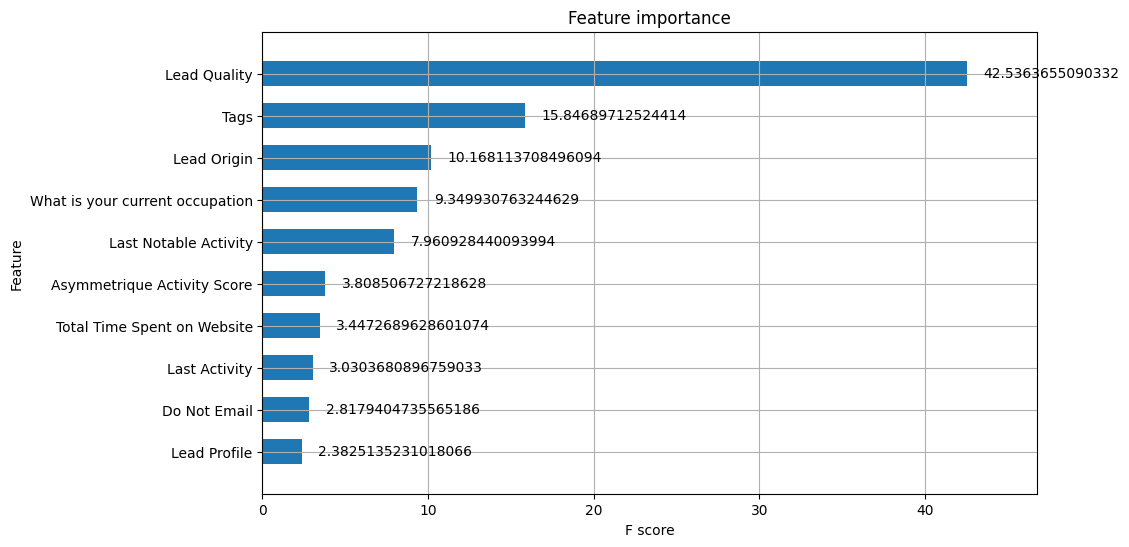

In [45]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Define the y-axis label
ylabel = 'Feature'

# Assuming 'model' is your trained XGBoost model
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(model,
                height=0.6, ylabel=ylabel, ax=ax,
                max_num_features=10, importance_type='gain')

# Display the plot
plt.show()

In [47]:
X_test['Predicted_Class'] = X_test['Predicted_Conversion'].replace({0: 'Not Converted', 1: 'Converted'})
X_test['Actual_Class'] = X_test['Actual_Conversion'].replace({0: 'Not Converted', 1: 'Converted'})

X_test_reset = X_test.reset_index()

result_df = df.join(X_test_reset, rsuffix='_drop', how='inner')

result_df = result_df[[col for col in result_df.columns if not col.endswith('_drop')]]

result_df.drop('Converted', axis=1, inplace=True)

In [48]:
result_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Predicted_Probability,Probability_Category,Predicted_Conversion,Actual_Conversion,Predicted_Class,Actual_Class
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.00,Page Visited on Website,...,15.0,No,No,Modified,0.98,High Probability,1,1,Converted,Converted
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.50,Email Opened,...,15.0,No,No,Email Opened,0.01,Undefined,0,0,Not Converted,Not Converted
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.00,Email Opened,...,20.0,No,Yes,Email Opened,0.00,Undefined,0,0,Not Converted,Not Converted
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.00,Unreachable,...,17.0,No,No,Modified,0.04,Undefined,0,0,Not Converted,Not Converted
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.00,Converted to Lead,...,18.0,No,No,Modified,0.00,Undefined,0,0,Not Converted,Not Converted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,e3d7f9af-1593-41e8-9682-c6ddfb9ee1b7,641612,Landing Page Submission,Direct Traffic,No,No,2.0,203,2.00,Email Opened,...,18.0,No,Yes,Email Opened,0.99,High Probability,1,1,Converted,Converted
1844,b3c94e33-69da-4163-a97e-a4825e233f95,641603,Landing Page Submission,Google,Yes,No,2.0,102,2.00,Email Bounced,...,18.0,No,No,Email Bounced,0.99,High Probability,1,1,Converted,Converted
1845,ff31e840-8fc7-45d0-a399-59accdb1f7dc,641602,API,Google,No,No,3.0,481,3.00,Email Opened,...,18.0,No,No,Email Opened,0.00,Undefined,0,0,Not Converted,Not Converted
1846,1451a32b-16de-482e-825e-8cef8c017064,641585,API,Google,No,No,9.0,195,2.25,Unreachable,...,15.0,No,No,Unreachable,0.94,High Probability,1,1,Converted,Converted
